**LISTA DE SOBREVIVIENTES DEL TITANIC**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [8]:
df['Survived'].value_counts()

Survived
0    545
1    342
Name: count, dtype: int64

In [9]:
df['Pclass'].value_counts()

Pclass
3    487
1    216
2    184
Name: count, dtype: int64

In [10]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [11]:
len(df)

887

In [12]:
df.notnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
882,True,True,True,True,True,True,True,True
883,True,True,True,True,True,True,True,True
884,True,True,True,True,True,True,True,True
885,True,True,True,True,True,True,True,True


In [13]:
df.notnull().apply(pd.Series.value_counts)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
True,887,887,887,887,887,887,887,887


No se evidencia datos faltantes. 

In [14]:
df = df.drop('Name', axis=1)

In [15]:
df.shape

(887, 7)

In [16]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSpo', 'ParChild', 'Fare']

In [17]:
df

,Survived,Pclass,Sex,Age,SibSpo,ParChild,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [18]:
df = pd.get_dummies(df, columns=["Sex"], drop_first=True)
df

,Survived,Pclass,Age,SibSpo,ParChild,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,True
883,1,1,19.0,0,0,30.0000,False
884,0,3,7.0,1,2,23.4500,False
885,1,1,26.0,0,0,30.0000,True


1 representa que el sexo del tripulantente era masculino. 

In [19]:
df.rename(columns={'Sex_male':'Sex'}, inplace=True)
df

,Survived,Pclass,Age,SibSpo,ParChild,Fare,Sex
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,True
883,1,1,19.0,0,0,30.0000,False
884,0,3,7.0,1,2,23.4500,False
885,1,1,26.0,0,0,30.0000,True


In [20]:
df['Sex'] = df['Sex'].astype(int)
df

,Survived,Pclass,Age,SibSpo,ParChild,Fare,Sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,1
883,1,1,19.0,0,0,30.0000,0
884,0,3,7.0,1,2,23.4500,0
885,1,1,26.0,0,0,30.0000,1


In [21]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSpo', 'ParChild', 'Fare']]
df

,Survived,Pclass,Sex,Age,SibSpo,ParChild,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,13.0000
883,1,1,0,19.0,0,0,30.0000
884,0,3,0,7.0,1,2,23.4500
885,1,1,1,26.0,0,0,30.0000


Queremos que nuestro "Traget" (variable o columna objetivo sea __Survived__)

In [22]:
X = df.drop("Survived", axis=1)
y = df.Survived

In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#30% para el test y #70% para el train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=00000) 

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
#Creación del modelo (profundidad, reproducibilidad)
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [28]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

<span style="font_size:larger;">__Evaluación del Modelo__</span>

In [29]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [30]:
# Cálculo de las métricas (accuracy)
from sklearn.metrics import accuracy_score

#Cálculo del accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Cálculo del accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy Train: ', train_accuracy)
print('Accuracy Test: ', test_accuracy)

Accuracy Train:  0.8048387096774193
Accuracy Test:  0.7640449438202247


Notamos por los _accuracy_ de que el modelo tuvo un desempeño bueno, no solo por el porcentaje de predicción, sino también por la diferencia entre Train y Test. 

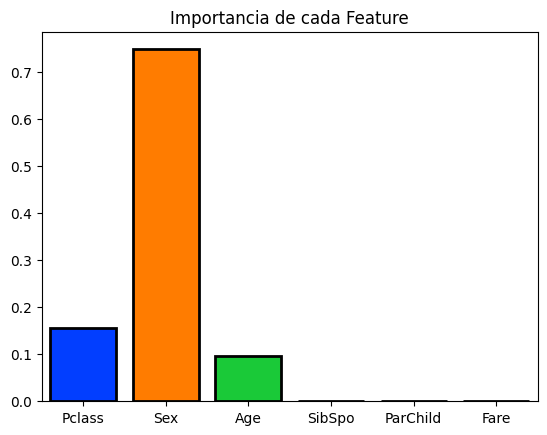

In [33]:
#verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)


sns.barplot(data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()

Podemos optar por un modelo más simplificado, ya que tres variables no fueron relevantes para la predicción de nuestro modelo. 
